In [44]:
import sys

sys.path.append("..")

import numpy as np
import matplotlib.pyplot as plt

plt.style.use("seaborn-notebook")
# from DA_PoC.dynamical_systems.examples.lorenz96 import Lorenz96Model
# from DA_PoC.dynamical_systems.examples.lorenz63 import Lorenz63Model
# from DA_PoC.common.numerical_model import NumericalModel
from DA_PoC.dynamical_systems.lorenz_numerical_model import (
    LorenzWrapper,
)

In [45]:
rng = np.random.default_rng(seed=93)

n = 40
nobs = 1000

In [46]:
lorenz = LorenzWrapper(n)
lorenz.H = lambda x: x
lorenz.set_observations(nobs=nobs, burn=1)
lorenz.n_total_obs = nobs

trajectory = lorenz.forward_model(lorenz.obs.reshape(n, -1)[:, -1]).reshape(n, -1)

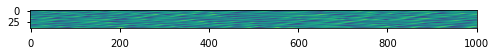

In [47]:
plt.imshow(trajectory)

In [53]:
def construct_Lw(trajectory):
    trajectory_c = trajectory - trajectory.mean(1).reshape(n, -1)
    sigma_i = np.std(trajectory, 1)[:, None]
    X_traj = trajectory_c #/ sigma_i
    cov_matrix = X_traj @ X_traj.T
    w, L = map(np.real_if_close, np.linalg.eig(cov_matrix))
    w = np.real_if_close(w, tol = 1000)
    return w, L, cov_matrix

In [54]:
def construct_B_matrix(r, L, w):
    Lr = L[:, :r]
    return Lr @ np.diag(w[:r]) @ Lr.T

def plotEOFs(trajectory):
    w, L, cov_matrix = construct_Lw(trajectory)
    plt.subplot(2, 2, 1)
    plt.imshow(cov_matrix)
    plt.colorbar()

    plt.subplot(2, 2, 2)
    plt.plot(np.cumsum(w) / np.sum(w))
    plt.subplot(2, 2, 3)
    id = {}
    for p in [0.8, 0.9, 0.95, 0.99]:
        id[p] = np.arange(n)[(np.cumsum(w) / np.sum(w) > p)][0]
        print(f"{p} -> {id[p]} EOF needed")
    Br = construct_B_matrix(id[0.9], L, w)
    plt.imshow(np.real_if_close(Br))
    plt.colorbar()
    plt.subplot(2, 2, 4)
    plt.imshow(np.linalg.inv(cov_matrix))
    plt.colorbar()
    return Br, cov_matrix

0.8 -> 16 EOF needed
0.9 -> 22 EOF needed
0.95 -> 32 EOF needed
0.99 -> 38 EOF needed


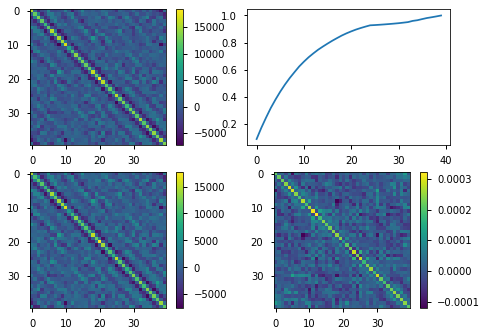

In [55]:
Br, cov_matrix = plotEOFs(trajectory)


In [51]:
print(f"{np.linalg.slogdet(Br)}")
print(f"{np.linalg.slogdet(cov_matrix)}, {np.linalg.det(cov_matrix)}")

(1.0, -372.1068189796897)
(1.0, 254.95843086653312), 5.333835776286528e+110


0.8 -> 11 EOF needed
0.9 -> 16 EOF needed
0.95 -> 20 EOF needed
0.99 -> 29 EOF needed


(array([[ 435.73051907,   10.33285087, -224.37716309, ..., -118.57272176,
         -226.0219432 ,   -0.71829088],
        [  10.33285087,  415.97931664,   64.38138057, ...,  130.20766531,
         -182.73040906, -145.36356897],
        [-224.37716309,   64.38138057,  458.10689155, ...,  204.99707837,
          128.38136675, -123.99507314],
        ...,
        [-118.57272176,  130.20766531,  204.99707837, ...,  435.86132347,
          -33.29489815, -260.66003194],
        [-226.0219432 , -182.73040906,  128.38136675, ...,  -33.29489815,
          460.26749033,   71.1505385 ],
        [  -0.71829088, -145.36356897, -123.99507314, ..., -260.66003194,
           71.1505385 ,  451.50199117]]),
 array([[ 500.        ,  -15.582784  , -221.964004  , ...,  -95.27489857,
         -240.31086259,    9.88003099],
        [ -15.582784  ,  500.        ,   72.3424564 , ...,  125.5030615 ,
         -151.90798084, -145.07432729],
        [-221.964004  ,   72.3424564 ,  500.        , ...,  209.42900299,

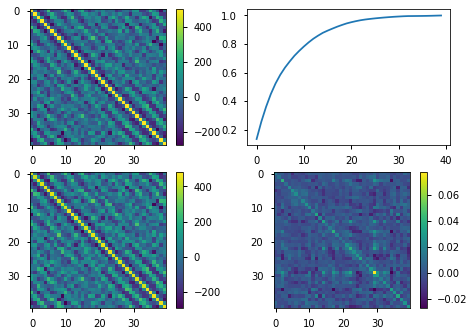

In [52]:
plotEOFs(trajectory[:, :nobs // 2])